In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 9:1
df = pd.read_csv('../../Dataset/VCB-Historical-Data_Group-9.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df = df[['Date','Price']]

data = df[['Price']]
data = data.dropna()
data = data.reset_index(drop=True) 


In [3]:
df

,Date,Price
0,3/1/2019,47765.0
1,3/4/2019,48226.0
2,3/5/2019,48379.0
3,3/6/2019,48149.0
4,3/7/2019,48456.0
...,...,...
1308,5/27/2024,90200.0
1309,5/28/2024,90700.0
1310,5/29/2024,89800.0
1311,5/30/2024,88600.0


In [4]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 9:1
train_size = int(0.9 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

In [5]:
# 3. Preparing the data

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)

In [6]:
# 4.  Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [7]:
# 5. Predict on test set
y_pred = model.predict(x_test)

In [8]:
# 7. RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = np.mean(np.abs((y_test - y_pred) / y_pred)) * 100
test_mae = np.mean(np.abs(y_test - y_pred))

print("Mean Absolute Percentage Error (MAPE):", test_mape)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)

Mean Absolute Percentage Error (MAPE): 6.910127032863789
Mean Absolute Error (MAE): 5853.91286126289
Root Mean Squared Error (RMSE): 6673.749780289205


In [9]:
# 7.1. Predicted closing prices for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index, last_index+30)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print(last_data)

Predicted closing prices for the next 30 days:
[[85891.02374707]
 [85912.32499542]
 [85933.62624377]
 [85954.92749212]
 [85976.22874047]
 [85997.52998882]
 [86018.83123717]
 [86040.13248552]
 [86061.43373387]
 [86082.73498222]
 [86104.03623057]
 [86125.33747892]
 [86146.63872727]
 [86167.93997562]
 [86189.24122397]
 [86210.54247231]
 [86231.84372066]
 [86253.14496901]
 [86274.44621736]
 [86295.74746571]
 [86317.04871406]
 [86338.34996241]
 [86359.65121076]
 [86380.95245911]
 [86402.25370746]
 [86423.55495581]
 [86444.85620416]
 [86466.15745251]
 [86487.45870086]
 [86508.75994921]]
RangeIndex(start=1312, stop=1342, step=1)


In [10]:
# 7.2. Predicted closing prices for the next 60 days
last_index =  data.index[-1]
last_data_60 = pd.RangeIndex(start=last_index+1, stop=last_index+61, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

y_next_60_days = model.predict(x_next_60_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_60_days)

Predicted closing prices for the next 30 days:
[[85912.32499542]
 [85933.62624377]
 [85954.92749212]
 [85976.22874047]
 [85997.52998882]
 [86018.83123717]
 [86040.13248552]
 [86061.43373387]
 [86082.73498222]
 [86104.03623057]
 [86125.33747892]
 [86146.63872727]
 [86167.93997562]
 [86189.24122397]
 [86210.54247231]
 [86231.84372066]
 [86253.14496901]
 [86274.44621736]
 [86295.74746571]
 [86317.04871406]
 [86338.34996241]
 [86359.65121076]
 [86380.95245911]
 [86402.25370746]
 [86423.55495581]
 [86444.85620416]
 [86466.15745251]
 [86487.45870086]
 [86508.75994921]
 [86530.06119756]
 [86551.36244591]
 [86572.66369426]
 [86593.96494261]
 [86615.26619096]
 [86636.56743931]
 [86657.86868766]
 [86679.16993601]
 [86700.47118436]
 [86721.77243271]
 [86743.07368106]
 [86764.37492941]
 [86785.67617776]
 [86806.97742611]
 [86828.27867446]
 [86849.5799228 ]
 [86870.88117115]
 [86892.1824195 ]
 [86913.48366785]
 [86934.7849162 ]
 [86956.08616455]
 [86977.3874129 ]
 [86998.68866125]
 [87019.9899096 ]

In [11]:
# 7.3. Predicted closing prices for the next 90 days
last_index =  data.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index, last_index+90)).reshape(-1, 1)

y_next_90_days = model.predict(x_next_90_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[[85891.02374707]
 [85912.32499542]
 [85933.62624377]
 [85954.92749212]
 [85976.22874047]
 [85997.52998882]
 [86018.83123717]
 [86040.13248552]
 [86061.43373387]
 [86082.73498222]
 [86104.03623057]
 [86125.33747892]
 [86146.63872727]
 [86167.93997562]
 [86189.24122397]
 [86210.54247231]
 [86231.84372066]
 [86253.14496901]
 [86274.44621736]
 [86295.74746571]
 [86317.04871406]
 [86338.34996241]
 [86359.65121076]
 [86380.95245911]
 [86402.25370746]
 [86423.55495581]
 [86444.85620416]
 [86466.15745251]
 [86487.45870086]
 [86508.75994921]
 [86530.06119756]
 [86551.36244591]
 [86572.66369426]
 [86593.96494261]
 [86615.26619096]
 [86636.56743931]
 [86657.86868766]
 [86679.16993601]
 [86700.47118436]
 [86721.77243271]
 [86743.07368106]
 [86764.37492941]
 [86785.67617776]
 [86806.97742611]
 [86828.27867446]
 [86849.5799228 ]
 [86870.88117115]
 [86892.1824195 ]
 [86913.48366785]
 [86934.7849162 ]
 [86956.08616455]
 [86977.3874129 ]
 [86998.68866125]

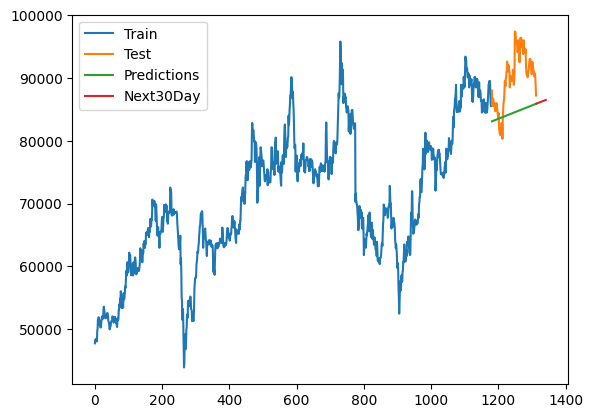

In [12]:
# 8.1. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

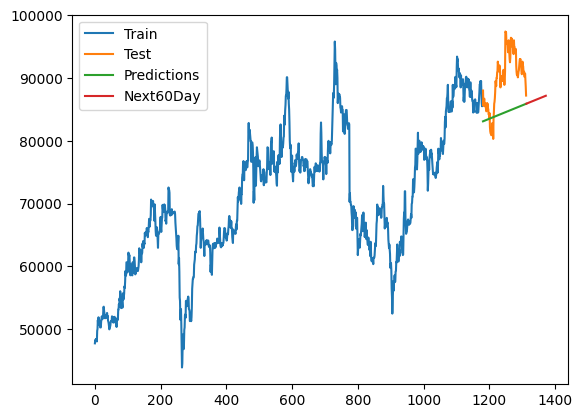

In [13]:
# 8.2. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

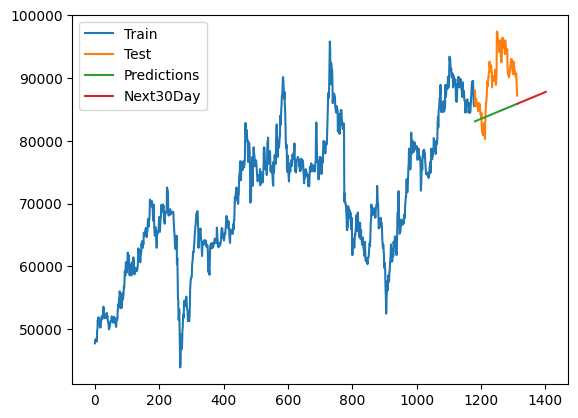

In [14]:
# 8.3. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()